<a href="https://colab.research.google.com/github/dixitaditya248/Image-to-Image-translation/blob/main/Image_to_image_translation(project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# giving path to the code file
%cd /content/drive/MyDrive/Team_09/UNIT_master

#/content/drive/MyDrive/Team_09/UNIT_master

In [ ]:
# installing the required libraries 
!pip install tensorboard tensorboardX

In [ ]:
#training the model
!python train.py --trainer UNIT --config configs/unit_summer2winter_yosemite256_folder.yaml

In [5]:
#testing DSLR image to get USB image (1.jpg)
!python test.py --trainer UNIT --config configs/unit_summer2winter_yosemite256_folder.yaml --input /content/drive/MyDrive/Team_09/UNIT_master/datasets/DA_datasets/TPA_13_Image_to_Image_translation/1.jpg --output_folder results/gta2city --checkpoint /content/drive/MyDrive/Team_09/UNIT_master/outputs/unit_summer2winter_yosemite256_folder/checkpoints/gen_00002002.pt --a2b 1

In [9]:
!python test.py --trainer UNIT --config configs/unit_summer2winter_yosemite256_folder.yaml --input /content/drive/MyDrive/Team_09/UNIT_master/datasets/DA_datasets/dslr_frames/10.jpg --output_folder results/gta2city --checkpoint /content/drive/MyDrive/Team_09/UNIT_master/outputs/unit_summer2winter_yosemite256_folder/checkpoints/gen_00002002.pt --a2b 1

In [ ]:
!python test.py --trainer UNIT --config configs/unit_summer2winter_yosemite256_folder.yaml --input /content/drive/MyDrive/UNIT_master/datasets/DA_datasets/dslr_frames/1008.jpg --output_folder results/gta2city --checkpoint /content/drive/MyDrive/UNIT_master/outputs/unit_summer2winter_yosemite256_folder/checkpoints/gen_00002002.pt --a2b 1

In [ ]:
!python test.py --trainer UNIT --config configs/unit_summer2winter_yosemite256_folder.yaml --input /content/drive/MyDrive/UNIT_master/datasets/DA_datasets/dslr_frames/1008.jpg --output_folder results/gta2city --checkpoint /content/drive/MyDrive/UNIT_master/outputs/unit_summer2winter_yosemite256_folder/checkpoints/gen_00002002.pt --a2b 1

In [ ]:
!python test.py --trainer UNIT --config configs/unit_summer2winter_yosemite256_folder.yaml --input /content/drive/MyDrive/UNIT_master/datasets/DA_datasets/dslr_frames/1008.jpg --output_folder results/gta2city --checkpoint /content/drive/MyDrive/UNIT_master/outputs/unit_summer2winter_yosemite256_folder/checkpoints/gen_00002002.pt --a2b 1

In [ ]:
#testing USB image to get DSLR image
!python test.py --trainer UNIT --config configs/unit_summer2winter_yosemite256_folder.yaml --input /content/drive/MyDrive/Team_09/UNIT_master/datasets/DA_datasets/usb_frames/1008.jpg --output_folder results/city2gta --checkpoint /content/drive/MyDrive/Team_09/UNIT_master/outputs/unit_summer2winter_yosemite256_folder/checkpoints/gen_00001000.pt --a2b 0    

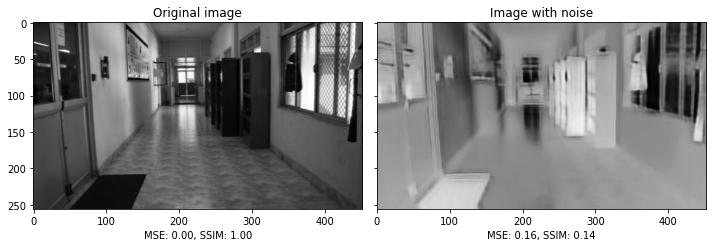

In [10]:
#Structural Similarity Index(SSIM) code
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error
from PIL import Image
from numpy import asarray
import sys
from skimage import io, color
from skimage.transform import resize

#reading the image file
lina_color = io.imread('/content/drive/MyDrive/Team_09/UNIT_master/results/gta2city/input.jpg')
lina_color1 = io.imread('/content/drive/MyDrive/Team_09/UNIT_master/results/gta2city/output.jpg')

img= color.rgb2gray(lina_color)
img1=color.rgb2gray(lina_color1)
row1,col1=img1.shape
img = resize(img, (row1, col1))
rows, cols = img.shape
 

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4),sharex=True, sharey=True)
ax = axes.ravel()

#SSIM calculation 
mse_none = mean_squared_error(img, img)
ssim_none = ssim(img, img, data_range=img.max() - img.min())

mse_noise = mean_squared_error(img, img1)
ssim_noise = ssim(img, img1,data_range=img1.max() - img1.min())

#image plotting
ax[0].imshow(img, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[0].set_xlabel(f'MSE: {mse_none:.2f}, SSIM: {ssim_none:.2f}')
ax[0].set_title('Original image')

ax[1].imshow(img1, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[1].set_xlabel(f'MSE: {mse_noise:.2f}, SSIM: {ssim_noise:.2f}')
ax[1].set_title('Image with noise')

plt.tight_layout()
plt.show()

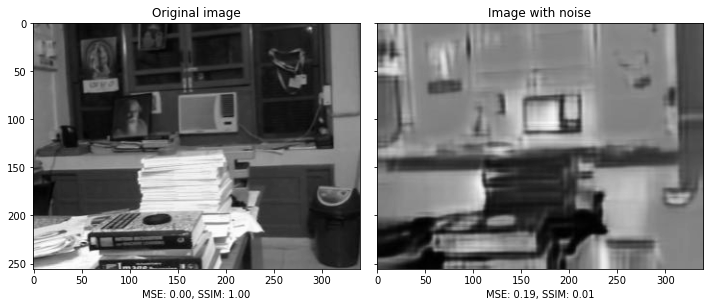

In [11]:
#Structural Similarity Index(SSIM) code
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error
from PIL import Image
from numpy import asarray
import sys
from skimage import io, color
from skimage.transform import resize

lina_color = io.imread('/content/drive/MyDrive/Team_09/UNIT_master/results/city2gta/input.jpg')
lina_color1 = io.imread('/content/drive/MyDrive/Team_09/UNIT_master/results/city2gta/output.jpg')

img= color.rgb2gray(lina_color)
img1=color.rgb2gray(lina_color1)
row1,col1=img1.shape
img = resize(img, (row1, col1))

rows, cols = img.shape
 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4),sharex=True, sharey=True)
ax = axes.ravel()

mse_none = mean_squared_error(img, img)
ssim_none = ssim(img, img, data_range=img.max() - img.min())

mse_noise = mean_squared_error(img, img1)
ssim_noise = ssim(img, img1,data_range=img1.max() - img1.min())

ax[0].imshow(img, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[0].set_xlabel(f'MSE: {mse_none:.2f}, SSIM: {ssim_none:.2f}')
ax[0].set_title('Original image')

ax[1].imshow(img1, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[1].set_xlabel(f'MSE: {mse_noise:.2f}, SSIM: {ssim_noise:.2f}')
ax[1].set_title('Image with noise')

plt.tight_layout()
plt.show()